In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [2]:
readMe = open('data/books/positive.review','r').readlines() #read = r
for i in range(30):
    print(readMe[i])

<review>

<unique_id>

0785758968:one_of_the_best_crichton_novels:joseph_m

</unique_id>

<asin>

0785758968

</asin>

<product_name>

Sphere: Books: Michael Crichton

</product_name>

<product_type>

books

</product_type>

<helpful>

0 of 1

</helpful>

<rating>

5.0

</rating>

<title>

One of the best Crichton novels

</title>

<date>

July 1, 2006

</date>

<reviewer>

Joseph M

</reviewer>

<reviewer_location>

Colorado, USA



In [3]:
categories = ['books', 'dvd', 'electronics', 'kitchen_&_housewares']

rows = []

for category in categories:
    for tag in ['negative', 'positive', 'unlabeled']:
        if (category != 'books') or (tag != 'unlabeled'):
            print(tag, category)
            with open('data/' + category + '/' + tag + '.review','r') as f:
                xml = f.read()

            xml = xml.replace('&amp;', ' ')
            xml = xml.replace('&quot;', ' ')
            xml = xml.replace('&', ' ') 
            xml = xml.replace('', ' ') 
            xml = xml.replace('"</span></a>', ' ') 
            xml = xml.replace('<P>', ' ') 
            tree = ET.fromstring('<root>' + xml + '</root>')

            for node in tree: 
                s_unique_id = node.find("unique_id").text.strip() if node is not None else None
                s_asin = node.find("asin").text.strip() if node is not None else None
                s_product_name = node.find("product_name").text.strip() if node is not None else None
                s_product_type = node.find("product_type").text.strip() if node is not None else None
                s_rating = node.find("rating").text.strip() if node is not None else None
                s_title = node.find("title").text.strip() if node is not None else None
                s_date = node.find("date").text.strip() if node is not None else None
                s_reviewer = node.find("reviewer").text.strip() if node is not None else None
                s_reviewer_location = node.find("reviewer_location").text.strip() if node is not None else None
                s_review_text = node.find("review_text").text.strip() if node is not None else None
                
                rows.append({
                    "unique_id": s_unique_id,
                    "asin": s_asin,
                    "product_name": s_product_name,
                    "product_type": s_product_type,
                    "rating": s_rating,
                    "title": s_title,
                    "date": s_date,
                    "reviewer": s_reviewer,
                    "reviewer_location": s_reviewer_location,
                    "review_text": s_review_text,
                    "sentiment": tag
                    })

len(rows)

negative books
positive books
negative dvd
positive dvd
unlabeled dvd
negative electronics
positive electronics
unlabeled electronics
negative kitchen_&_housewares
positive kitchen_&_housewares
unlabeled kitchen_&_housewares


72679

In [4]:
df = pd.DataFrame(rows)

In [5]:
df.head()

,unique_id,asin,product_name,product_type,rating,title,date,reviewer,reviewer_location,review_text,sentiment
0,"0312355645:horrible_book,_horrible.:mark_gospri",0312355645,Running with Scissors: A Memoir: Books: August...,books,1.0,"Horrible book, horrible.","November 14, 2006",Mark Gospri,,THis book was horrible. If it was possible to...,negative
1,1559278676:shallow_self-indulgence:joseph_s._p...,1559278676,Running with Scissors: A Memoir: Books: August...,books,1.0,shallow self-indulgence,"November 15, 2006","Joseph S. Perrott ""avid reader""","philadelphia, pa. United States",I like to use the Amazon reviews when purchasi...,negative
2,"1559278676:horrible_book,_horrible.:mark_gospri",1559278676,Running with Scissors: A Memoir: Books: August...,books,1.0,"Horrible book, horrible.","November 14, 2006",Mark Gospri,,THis book was horrible. If it was possible to...,negative
3,"0425193373:disappointment:reader_""reader""",0425193373,Fierce Conversations: Achieving Sucess at Work...,books,1.0,Disappointment,"March 13, 2006","Reader ""Reader""",,"I'm not sure who's writing these reviews, but ...",negative
4,0142004030:a_disappointing_mess:a._ross,0142004030,Lost in a Good Book (Thursday Next Novels): Bo...,books,2.0,A Disappointing Mess,"May 17, 2006",A. Ross,"Washington, DC",I picked up the first book in this series (The...,negative


In [6]:
df.shape

(72679, 11)

In [7]:
# df.to_csv('amazon_reviews.csv')

In [8]:
df.isna().sum()

unique_id            0
asin                 0
product_name         0
product_type         0
rating               0
title                0
date                 0
reviewer             0
reviewer_location    0
review_text          0
sentiment            0
dtype: int64

In [9]:
df['rating'] = df['rating'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72679 entries, 0 to 72678
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_id          72679 non-null  object 
 1   asin               72679 non-null  object 
 2   product_name       72679 non-null  object 
 3   product_type       72679 non-null  object 
 4   rating             72679 non-null  float64
 5   title              72679 non-null  object 
 6   date               72679 non-null  object 
 7   reviewer           72679 non-null  object 
 8   reviewer_location  72679 non-null  object 
 9   review_text        72679 non-null  object 
 10  sentiment          72679 non-null  object 
dtypes: float64(1), object(10)
memory usage: 6.1+ MB


### Exploratory Data Analysis

In [11]:
df.describe()

,rating
count,72679.000000
mean,4.078785
std,1.392362
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<AxesSubplot:ylabel='Frequency'>

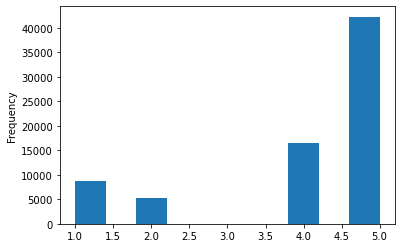

In [12]:
df['rating'].plot.hist()

In [13]:
df[df['rating'] == 3]

,unique_id,asin,product_name,product_type,rating,title,date,reviewer,reviewer_location,review_text,sentiment


In [14]:
len(df['asin'].value_counts())

13520

<AxesSubplot:>

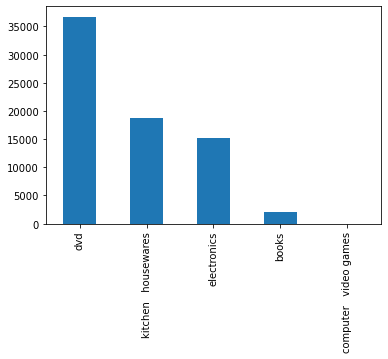

In [15]:
df['product_type'].value_counts().plot(kind='bar')

### Handling missing values

In [16]:
unlabelled = len(df[df['sentiment'] == 'unlabeled'])
print('Unlabelled Data:', unlabelled)
print('Percent:', (unlabelled/ len(df)) * 100)

Unlabelled Data: 64679
Percent: 88.9926939005765


In [17]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "positive"
    elif (rating == 3) or (rating == 2) or (rating == 1):
        return "negative"

In [18]:
for index, row in df.iterrows():
    if row['sentiment'] == 'unlabeled':
        df.loc[index , 'sentiment'] = sentiments(row['rating'])

In [19]:
df[df['sentiment'] == 'unlabeled']

,unique_id,asin,product_name,product_type,rating,title,date,reviewer,reviewer_location,review_text,sentiment


### Text Cleaning

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

en_stopwords = set(stopwords.words('english')) 

def clean_content(message: str):

    # Converting content to lowercase
    message = message.lower()
    # Replace URL with empty string
    message = re.sub(r'(?:https?:\/\/)?([a-zA-Z][a-zA-Z0-9._\-]+.[a-zA-Z0-9]+(\.[a-zA-Z0-9._\-]{2,3})+)', '', message)
    # Remove characters apart from alphabets
    message = re.sub('([^A-Za-z ])+', ' ', message)
    message = message.replace('\n', ' ')
    # Remove words less than 3 characters
    message = re.sub(r'(\b.{1,2}\s)+', ' ', message)
    # Remove mulitiple whitespace
    message = re.sub(r' +', ' ', message)

    # Removing stopwords & perform stemming
    porter = PorterStemmer()

    clean_str = []
    word_tokens = nltk.word_tokenize(message)
    for word in word_tokens: 
        if word not in en_stopwords:
            clean_str.append(porter.stem(word))
    
    message = ' '.join(clean_str)
    
    
    return message

### Testing text cleaning function

In [21]:
tst = """This is true story of Finnish soldiers. Actions take place in Taipale. They are men who defend Finland in Mannerheim line.
25000 Finnish soldiers and 300000 Soviet Union soldiers died in that war. It last's only 105 days. It was 1939-1940.

Facts about winter war:http://www.winterwar.com/mainpage.htm

They now sell this movie in full lenght DVD, with * 3 h 11 min * WS 14/9 * DD Surround in Finnish * Subtitles: SUOMI, English, Swedish. * R0 PAL, and there is also some extras.

http://www.filmifriikki.fi
"""
clean_content(tst)

'true stori finnish soldier action take place taipal men defend finland mannerheim line finnish soldier soviet union soldier die war last day fact winter war sell movi full lenght dvd min surround finnish subtitl suomi english swedish pal also extra'

### Feature Selection

In [22]:
df["all_meta"] = df['review_text'].astype("str") + ' ' + df['title'].astype("str")

In [23]:
df.head()['all_meta'][0]

"THis book was horrible.  If it was possible to rate it lower than one star i would have.  I am an avid reader and picked this book up after my mom had gotten it from a friend.  I read half of it, suffering from a headache the entire time, and then got to the part about the relationship the 13 year old boy had with a 33 year old man and i lit this book on fire.  One less copy in the world...don't waste your money.\n\nI wish i had the time spent reading this book back so i could use it for better purposes.  THis book wasted my life Horrible book, horrible."

In [24]:
df['all_meta'] = df['all_meta'].apply(clean_content)

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X = df[['all_meta']].copy()
y = df['sentiment'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
X_train = X_train.copy()
X_test = X_test.copy()

### Text Vectorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['all_meta'])
X_test_vec = vectorizer.transform(X_test['all_meta'])

### Modelling

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb_cv = MultinomialNB().fit(X_train_vec, y_train)

# predict the labels on validation dataset
predictions_NB_cv = nb_cv.predict(X_test_vec)
# Use accuracy_score function to get the accuracy
from sklearn.metrics import accuracy_score
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB_cv, y_test)*100)

Naive Bayes Accuracy Score ->  85.30544854155201


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vec, y_train)
# print("Random Forest Accuracy Score -> ", rf.score(X_test_vec, y_test)*100)

predictions_rf_cv = rf.predict(X_test_vec)
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf_cv, y_test)*100)

Random Forest Accuracy Score ->  87.77288570904422


### Evaluation

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

accuracy = accuracy_score(y_test, predictions_NB_cv)
print('Accuracy: %f' % accuracy)

y_test_np = y_test.copy()
predictions_NB_cv_np = predictions_NB_cv.copy()

y_test_np[y_test_np == 'positive'] = 1
y_test_np[y_test_np == 'negative'] = 0
predictions_NB_cv_np[predictions_NB_cv_np == 'positive'] = 1
predictions_NB_cv_np[predictions_NB_cv_np == 'negative'] = 0
y_test_np = y_test_np.astype('int32')
predictions_NB_cv_np = predictions_NB_cv_np.astype('int32')

precision = precision_score(y_test_np , predictions_NB_cv_np)
print('Precision: %f' % precision)

recall = recall_score(y_test_np, predictions_NB_cv_np)
print('Recall: %f' % recall)

f1 = f1_score(y_test_np, predictions_NB_cv_np)
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test_np, predictions_NB_cv_np)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test_np, predictions_NB_cv_np)
print(matrix)

Accuracy: 0.853054
Precision: 0.928580
Recall: 0.886978
F1 score: 0.907302
ROC AUC: 0.797343
[[ 2920  1206]
 [ 1998 15680]]


<AxesSubplot:>

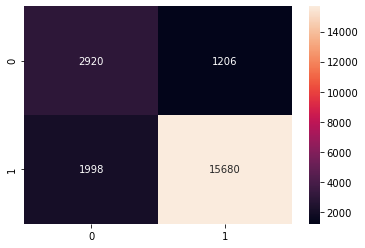

In [30]:
#Confusion Matrix
sns.heatmap(matrix, annot=True, fmt='')

In [31]:
predictions_rf_cv_np = predictions_rf_cv.copy()
predictions_rf_cv_np[predictions_rf_cv_np == 'positive'] = 1
predictions_rf_cv_np[predictions_rf_cv_np == 'negative'] = 0
predictions_rf_cv_np = predictions_rf_cv_np.astype('int32')

precision = precision_score(y_test_np , predictions_rf_cv_np)
print('Precision: %f' % precision)

recall = recall_score(y_test_np, predictions_rf_cv_np)
print('Recall: %f' % recall)

f1 = f1_score(y_test_np, predictions_rf_cv_np)
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test_np, predictions_rf_cv_np)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test_np, predictions_rf_cv_np)
print(matrix)

Precision: 0.870813
Recall: 0.997115
F1 score: 0.929694
ROC AUC: 0.681665
[[ 1511  2615]
 [   51 17627]]


<AxesSubplot:>

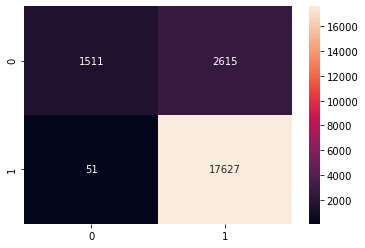

In [32]:
#Confusion Matrix
sns.heatmap(matrix, annot=True, fmt='')

### Product Sentiment Analysis

In [33]:
def product_sentiment(asin):
    product_df = df[df['asin'] == asin]['all_meta']
    product_vec = vectorizer.transform(product_df)
    sentiment_pred = nb_cv.predict(product_vec)
    pos_pred = sentiment_pred[sentiment_pred == 'positive']
    neg_pred = sentiment_pred[sentiment_pred == 'negative']
    return (len(pos_pred)/len(product_df)) * 100, (len(neg_pred)/len(product_df)) * 100

asin = 'B000ICL3KG'
product_sentiment(asin)

(57.89473684210527, 42.10526315789473)

**Conclusion:**   
>    The product_sentiment function returns percentage of positive and negative response of the product. This way the product analyst can understand the overall sentiment of the customer on a particular product.